## Problem Statement

Business Problem Overview
To expand business on the basis of revenue-generating clients, telco businesses must both draw in new ones and prevent contract terminations (=churn). When it comes to contract termination, clients may do so for a variety of reasons, including better price offers more enticing packages, negative service interactions, or changes in their circumstances.

Customers in the telecom sector have access to a variety of service providers and can actively switch from one operator to another. The telecoms business has an average annual churn rate of 15 to 25 percent in this fiercely competitive market. Customer retention has now surpassed customer acquisition in importance due to the fact that it is 5–10 times more expensive to gain new customers than to keep existing ones.

Churn analytics offers useful tools for estimating client churn and defining its fundamental causes of it. The percentage of consumers that cancel a product or service within a specified time frame is the most common way to display the churn indicator (mostly months).

Business Objective
In order to minimize the customer churn rate, I will perform exploratory data analysis on customer-level data to identify the key signs of why customers are leaving the business.

In [1]:
## Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing dataset

In [4]:
data = pd.read_csv('Telecom_Churn.csv')

In [5]:
## Viewing data's first 5 row

data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
## Checking shape of data

data.shape

(3333, 20)

### Data has 3333 rows and 20 columns.
#### Variables Description
State :categorica for the 50 states

Account Length :how long account has been active

Area Code :Code Number of Area having some States included in each area code

lntl Plan :Internat ional plan activated ( yes, no )

VMail Plan :ice Mail plan activated ( yes ,no )

VMail Message :No.of voice mail messages

Total Day Mins :Total day minutes used

Total Day calls :Total day calls made

Total Day Charge :Total day charge

Total Eve Mins :Total evening minutes

Total Eve Calls :Total evening calls

Total Eve Charge :Total evening charge

Total Night Mins :Total night minutes

Total Night Calls :Total night calls

Total Night Charge :Total night charge

Total Intl Mins :Total International minutes used

Total Intl Calls :Total International calls made

Total Intl Charge :Total International charge

CustServ calls :Number of customer service caUs made

Churn :Customer churn (Target Variable True=1, False=0)

In [7]:
## Checking data types

data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [8]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
## In our data there are no null or missing values

In [10]:
## Checking unique values in each feature

data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [11]:
## Statistical analysis of data

data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
# Creating copy of the current data and assigning to df

df = data.copy()

In [13]:
## Creating churn dataset

df_churn = df[(df['Churn'] == True)]

In [14]:
## Exploring Target Labels - Univariate analysis

In [15]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Churn')

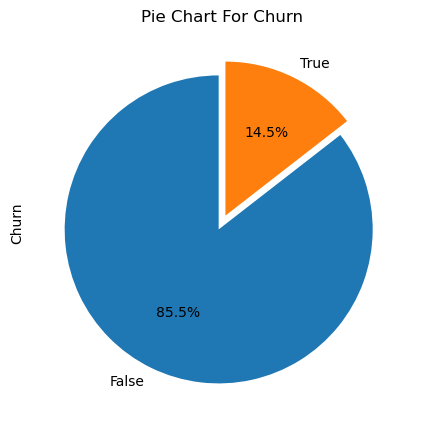

In [16]:
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Churn')

#### 1. Why did I pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

#### 2. What is/are the insight(s) found from the chart?
Our data is imbalance

Any data with unequal class distribution is technically imbalance.

In my data 85.5% data is of not getting churn and remaining 14.5% is of getting churn.

#### 3. Will the gained insights help creating a positive business impact?
I observed that 14.5% churning means 14.5% customers lost.

In [17]:
## Exploring State feature - Bivariate analysis

In [18]:
# Unique states

df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [19]:
# Number of Unique states

df['State'].nunique()

51

In [20]:
# Creating df_statewise_churn_count% for analysis

states_name = df['State'].unique()
churn_true = [df[(df['State'] == state)]['Churn'].value_counts()[1] for state in states_name]
chrun_false = [df[(df['State'] == state)]['Churn'].value_counts()[0] for state in states_name]

df_statewise_churn_count = pd.DataFrame({'states_name' : states_name,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})

df_statewise_churn_count['churn_true %'] = round(((df_statewise_churn_count['churn_true'])/
                                                 ((df_statewise_churn_count['churn_true'])+ (df_statewise_churn_count['chrun_false'])))*100,2)
df_statewise_churn_count['churn_false %'] = round(((df_statewise_churn_count['chrun_false'])/
                                                  ((df_statewise_churn_count['churn_true'])+ (df_statewise_churn_count['chrun_false'])))*100,2)
df_statewise_churn_count

,states_name,churn_true,chrun_false,churn_true %,churn_false %
0,KS,13,57,18.57,81.43
1,OH,10,68,12.82,87.18
2,NJ,18,50,26.47,73.53
3,OK,9,52,14.75,85.25
4,AL,8,72,10.00,90.00
5,MA,11,54,16.92,83.08
6,MO,7,56,11.11,88.89
7,LA,4,47,7.84,92.16
8,WV,10,96,9.43,90.57
9,IN,9,62,12.68,87.32


In [21]:
## Filtering states which have rate more than 20% 

df_statewise_churn_more_20 = df_statewise_churn_count.sort_values(by=['churn_true %'],ascending=False)[(df_statewise_churn_count['churn_true %']>=20)]
df_statewise_churn_more_20

,states_name,churn_true,chrun_false,churn_true %,churn_false %
36,CA,9,25,26.47,73.53
2,NJ,18,50,26.47,73.53
17,TX,18,54,25.00,75.00
29,MD,17,53,24.29,75.71
21,SC,14,46,23.33,76.67
33,MI,16,57,21.92,78.08
46,MS,14,51,21.54,78.46
40,WA,14,52,21.21,78.79
42,NV,14,52,21.21,78.79
45,ME,13,49,20.97,79.03


Text(0, 0.5, '% Churn Rate')

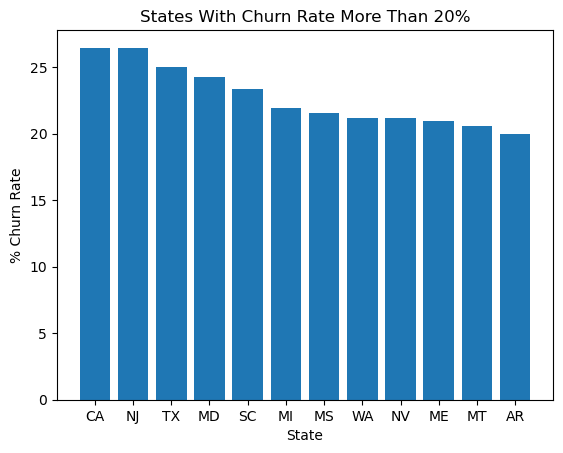

In [22]:
# bar plot of states which have rate more than 20% 

plt.bar(df_statewise_churn_more_20['states_name'],df_statewise_churn_more_20['churn_true %'])
plt.title('States With Churn Rate More Than 20%')
plt.xlabel('State')
plt.ylabel('% Churn Rate')

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
State 'CA' , 'NJ' have high churn rate of 26.47%.

'CA', 'NJ', 'TX', 'MD', 'SC', 'MI', 'MS', 'WA', 'NV', 'ME', 'MT' and 'AR' have churn rate more than 20%.

#### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact by identifying which states have high churn rates and targeting those areas for improved retention strategies.

In [23]:
## Bottom 10 States which have less churn rate

df_statewise_churn_count.sort_values(by = ['churn_true %']).head(10)

,states_name,churn_true,chrun_false,churn_true %,churn_false %
24,HI,3,50,5.66,94.34
28,AK,3,49,5.77,94.23
20,AZ,4,60,6.25,93.75
16,VA,5,72,6.49,93.51
11,IA,3,41,6.82,93.18
7,LA,4,47,7.84,92.16
22,NE,5,56,8.20,91.80
25,IL,5,53,8.62,91.38
31,WI,7,71,8.97,91.03
10,RI,6,59,9.23,90.77


Text(0, 0.5, '% Churn Rate')

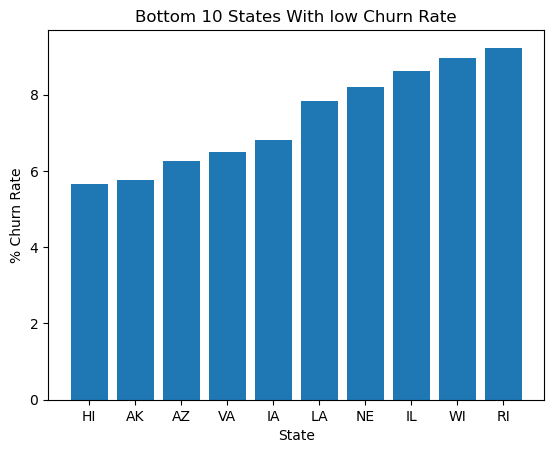

In [24]:
## Bar plot of Bottom 10 States which have less churn rate

plt.bar((df_statewise_churn_count.sort_values(by = ['churn_true %']).head(10))['states_name'],(df_statewise_churn_count.sort_values(by=['churn_true %']).head(10))['churn_true %'])
plt.title('Bottom 10 States With low Churn Rate')
plt.xlabel('State')
plt.ylabel('% Churn Rate')

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
State 'HI' , 'AK' have low churn rate of 5.66% and 5.77%.

'AJ', 'VA', 'IA', 'NE', 'LA', 'IL', 'WI', 'RI' have churn rate less than 10%.

State 'RI' have high churn rate of 9.23%.

#### 3. Will the gained insights help creating a positive business impact?
Yes, the company can analyze and replicate the factors that are contributing to its success in order to improve retention in other states.

In [25]:
## Exploring Area code feature - Bivariate analysis

In [26]:
## Unique area code

df['Area code'].nunique()

3

In [27]:
## Value count of each area code

df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

Text(0.5, 1.0, ' Churn count area code wise')

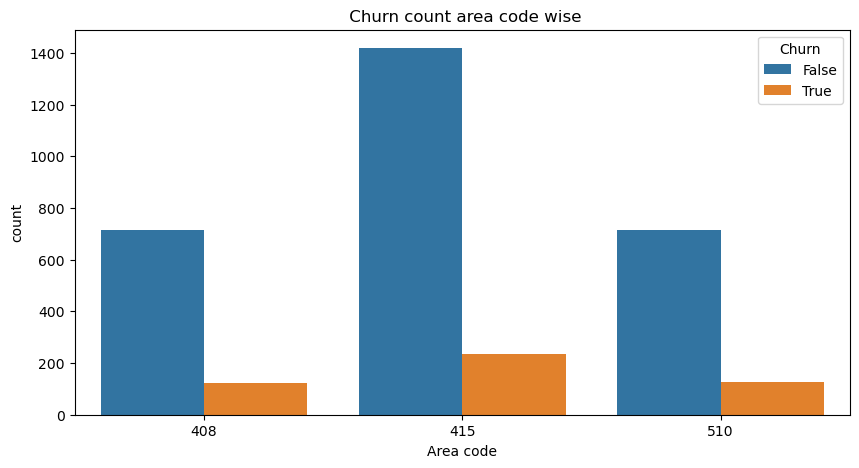

In [28]:
## Ploting churn count area code wise

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = df['Area code'],hue = 'Churn',data = df)
plt.title(' Churn count area code wise')

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the count of true churn with respect to area code, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
I observed that almost 50% of customers are from area code 415

Area codes 408 and 510 consist of almost 25% of customers

#### 3. Will the gained insights help creating a positive business impact?
No

In [29]:
df_Area_Code_415 = df.groupby('Area code').get_group(415)
df_Area_Code_415[df_Area_Code_415['Churn'] == True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
76,DC,82,415,No,No,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,ID,82,415,No,No,0,266.9,83,45.37,229.7,74,19.52,251.7,99,11.33,11.0,6,2.97,3,True
3268,WA,84,415,No,No,0,289.1,100,49.15,233.8,97,19.87,223.5,148,10.06,12.7,2,3.43,2,True
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,True
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True


In [30]:
## creating df_areawise_churn_count%

area_code = df['Area code'].unique()
churn_true = [df[(df['Area code'] == area)]['Churn'].value_counts()[1] for area in area_code]
chrun_false = [df[(df['Area code'] == area)]['Churn'].value_counts()[0] for area in area_code]

df_areawise_churn_count = pd.DataFrame({'area_code' : area_code,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})
df_areawise_churn_count
df_areawise_churn_count['churn_true %'] = round(((df_areawise_churn_count['churn_true'])/
                                                 ((df_areawise_churn_count['churn_true'])+ (df_areawise_churn_count['chrun_false'])))*100,2)
df_areawise_churn_count['churn_false %'] = round(((df_areawise_churn_count['chrun_false'])/
                                                  ((df_areawise_churn_count['churn_true'])+ (df_areawise_churn_count['chrun_false'])))*100,2)
df_areawise_churn_count

,area_code,churn_true,chrun_false,churn_true %,churn_false %
0,415,236,1419,14.26,85.74
1,408,122,716,14.56,85.44
2,510,125,715,14.88,85.12


Text(0.5, 1.0, 'churn rate % of each area')

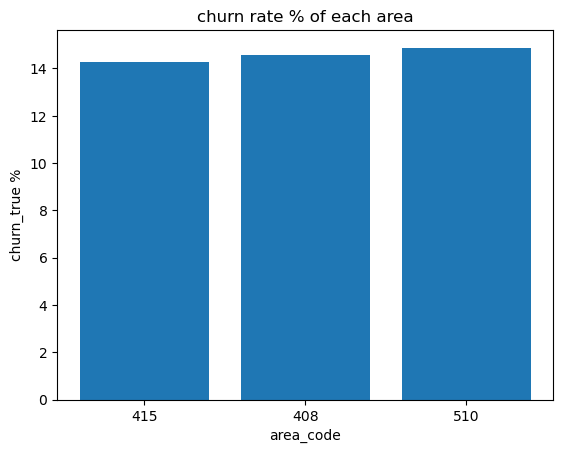

In [31]:
## Ploting churn rate % of each area

plt.bar(df_areawise_churn_count['area_code'].astype('str'),df_areawise_churn_count['churn_true %'])
plt.xlabel("area_code")
plt.ylabel("churn_true %")
plt.title("churn rate % of each area")

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
There is three area code that is 408, 415, 510

Churn rate of all 3 area code almost same that is around 14.5%

#### 3. Will the gained insights help creating a positive business impact?
Yes, the similarity in churn rates across all three area codes suggests that there may be common factors contributing to customer churn, which can be further analyzed to develop strategies to address those issues.

In [32]:
## Exploring Account length feature - Univariate and Bivariate analysis

In [33]:
## Creating Account lenth churn and not churn df

Account_length_churn = df[(df['Churn'] == True)]
Account_length_not_churn = df[(df['Churn'] == False)]

In [34]:
## Mean 

print('Mean of Accout length of all data',df['Account length'].mean())
print('Mean of Accout length of Churn',Account_length_churn['Account length'].mean())
print('Mean of Accout length of Not churn',Account_length_not_churn['Account length'].mean())

Mean of Accout length of all data 101.06480648064806
Mean of Accout length of Churn 102.66459627329192
Mean of Accout length of Not churn 100.79368421052632


In [35]:
## Median 

df['Account length'].median()
print('Median of Accout length of all data',df['Account length'].median())
print('Median of Accout length of Churn',Account_length_churn['Account length'].median())
print('Median of Accout length of Not churn',Account_length_not_churn['Account length'].median())

Median of Accout length of all data 101.0
Median of Accout length of Churn 103.0
Median of Accout length of Not churn 100.0


In [36]:
## Here all Means and Medians of acount length are almost same then we can say account lenth is normally distrubuted .

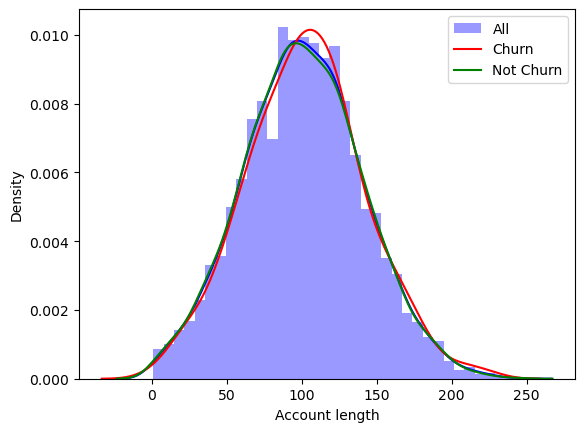

In [37]:
sns.distplot(df['Account length'], color = 'blue' , label = 'All') 
sns.distplot(Account_length_churn['Account length'],color = 'red' , label = 'Churn',hist = False)
sns.distplot(Account_length_not_churn['Account length'],color = 'green' , label = 'Not Churn',hist = False) 
plt.legend()

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

#### 2. What is/are the insight(s) found from the chart?
The account length of churn, not churn and for all data is normal distribution

#### 3. Will the gained insights help creating a positive business impact?
Yes, understanding the normal distribution of account length for churn, not churn, and all data can help a telecom company create targeted retention strategies for customers with shorter account lengths, who may be at a higher risk of churning. This can have a positive impact on the business by reducing customer churn and increasing customer retention.

<Figure size 1000x800 with 0 Axes>

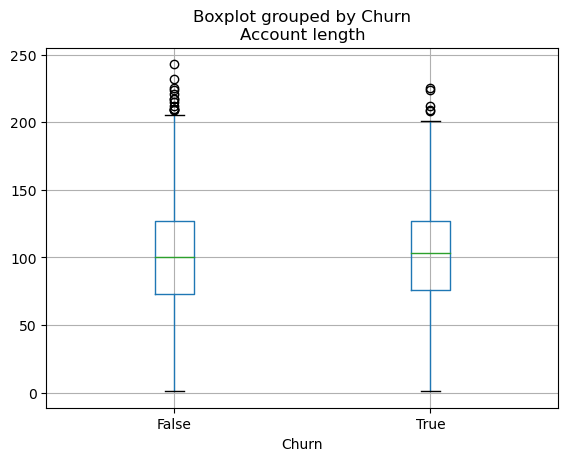

In [38]:
## Analysing by using boxplot diagram between 'Account length' and 'churn'

fig = plt.figure(figsize = (10, 8)) 
df.boxplot(column = 'Account length', by = 'Churn')
fig.suptitle('Account length', fontsize = 14, fontweight = 'bold')
plt.show()

#### 1. Why did you pick the specific chart?
boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
the account length have some outliers in upper side

#### 3. Will the gained insights help creating a positive business impact?
Yes, identifying outliers in the account length could indicate that certain customers have been with the company for a long time and may be less likely to churn.

In [39]:
## Exploring International plan feature - Univariate and Bivariate analysis

In [40]:
## cheking unique values

df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
## checking value count

df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

Text(0.5, 1.0, 'Pie Chart For International plan')

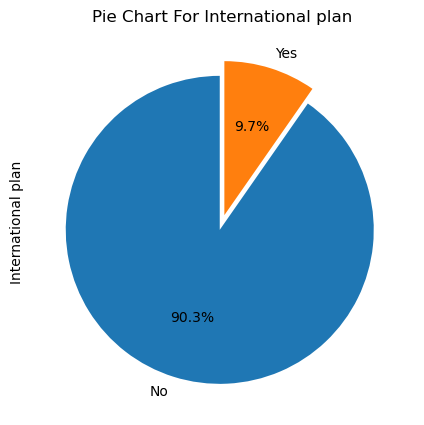

In [42]:
## Ploting value counts

df['International plan'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For International plan')

#### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

#### 2. What is/are the insight(s) found from the chart?
Only 9.7% customer use International plan

In [43]:
## creating df International plan churn count%

Int_plan = df['International plan'].unique()
churn_true = [df[(df['International plan'] == plan)]['Churn'].value_counts()[1] for plan in Int_plan]
chrun_false = [df[(df['International plan'] == plan)]['Churn'].value_counts()[0] for plan in Int_plan]

df_Int_plan_churn_count=pd.DataFrame({'International plan' : Int_plan,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})

df_Int_plan_churn_count['churn_true %'] = round(((df_Int_plan_churn_count['churn_true'])/
                                                 ((df_Int_plan_churn_count['churn_true'])+ (df_Int_plan_churn_count['chrun_false'])))*100,2)
df_Int_plan_churn_count['churn_false %'] = round(((df_Int_plan_churn_count['chrun_false'])/
                                                  ((df_Int_plan_churn_count['churn_true'])+ (df_Int_plan_churn_count['chrun_false'])))*100,2)
df_Int_plan_churn_count

,International plan,churn_true,chrun_false,churn_true %,churn_false %
0,No,346,2664,11.50,88.50
1,Yes,137,186,42.41,57.59


Text(0.5, 1.0, 'churn rate % of International plan')

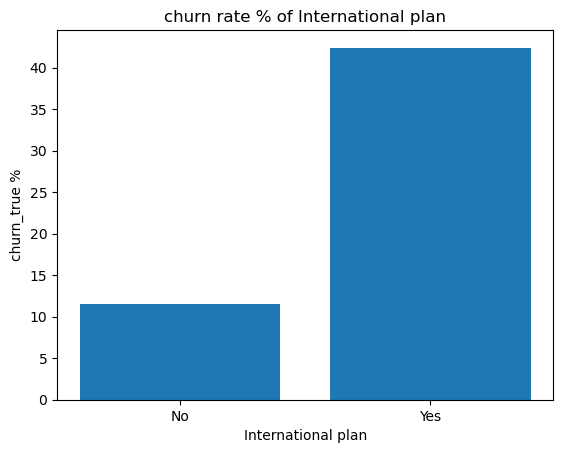

In [44]:
## Ploting churn rate % of International plan

plt.bar(df_Int_plan_churn_count['International plan'].astype('str'),df_Int_plan_churn_count['churn_true %'])
plt.xlabel("International plan")
plt.ylabel("churn_true %")
plt.title("churn rate % of International plan")

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to International plan, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
If International plan is yes then churn rate is high that is 42.41%

If International plan is No then churn rate is low that is 11.5%

#### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact. By understanding that customers with an international plan have a higher churn rate, the company can target those customers with retention efforts and incentives to keep them from leaving.

In [45]:
## Exploring Voice mail plan feature - Univariate and Bivariate analysis

In [46]:
## checking value count of Voice mail plan

df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Voice mail plan')

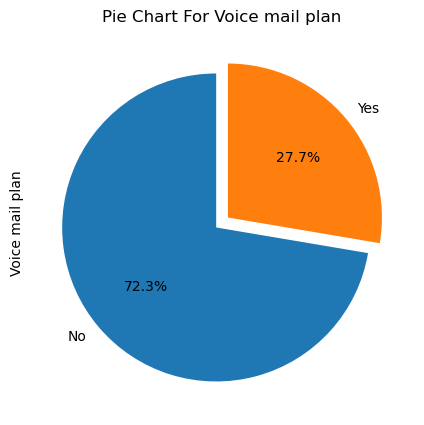

In [47]:
## Ploting value counts

df['Voice mail plan'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Voice mail plan')

#### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

#### 2. What is/are the insight(s) found from the chart?
Only 27.7% customer use Voice mail plan

In [48]:
## creating df Voice mail plan churn count%

voice_plan = df['Voice mail plan'].unique()
churn_true = [df[(df['Voice mail plan'] == plan)]['Churn'].value_counts()[1] for plan in voice_plan]
chrun_false = [df[(df['Voice mail plan'] == plan)]['Churn'].value_counts()[0] for plan in voice_plan]

df_voice_plan_churn_count=pd.DataFrame({'Voice mail plan' : Int_plan,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})

df_voice_plan_churn_count['churn_true %'] = round(((df_voice_plan_churn_count['churn_true'])/
                                                 ((df_voice_plan_churn_count['churn_true'])+ (df_voice_plan_churn_count['chrun_false'])))*100,2)
df_voice_plan_churn_count['churn_false %'] = round(((df_voice_plan_churn_count['chrun_false'])/
                                                  ((df_voice_plan_churn_count['churn_true'])+ (df_voice_plan_churn_count['chrun_false'])))*100,2)
df_voice_plan_churn_count

,Voice mail plan,churn_true,chrun_false,churn_true %,churn_false %
0,No,80,842,8.68,91.32
1,Yes,403,2008,16.72,83.28


Text(0.5, 1.0, 'churn rate % of International plan')

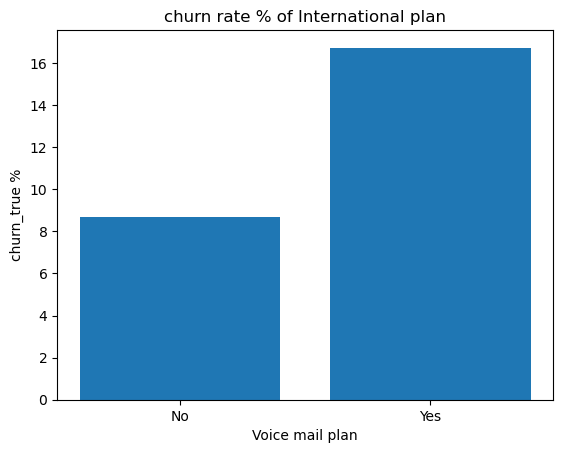

In [49]:
## Ploting churn rate % of Voice mail plan

plt.bar(df_voice_plan_churn_count['Voice mail plan'],df_voice_plan_churn_count['churn_true %'])
plt.xlabel("Voice mail plan")
plt.ylabel("churn_true %")
plt.title("churn rate % of International plan")

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to International plan, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
If voice plan activate then churn rate is 16.72%

If voice plan not activate then churn rate is 8.68%

#### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact by identifying a voice plan activation that affects churn rate. This information can be used to target marketing and retention efforts towards customers who have not activated their voice plan, in order to reduce the churn rate. Additionally, the information can also be used to improve the value and benefits of voice plans in order to increase activation and reduce churn among voice plan customers.

In [50]:
## Exploring Number vmail messages feature - Univariate and Bivariate analysis

In [51]:
## show the data of 'Number vmail messages' 

df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [52]:
## details of 'Number vmail messages' data

df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

<Axes: xlabel='Number vmail messages', ylabel='Density'>

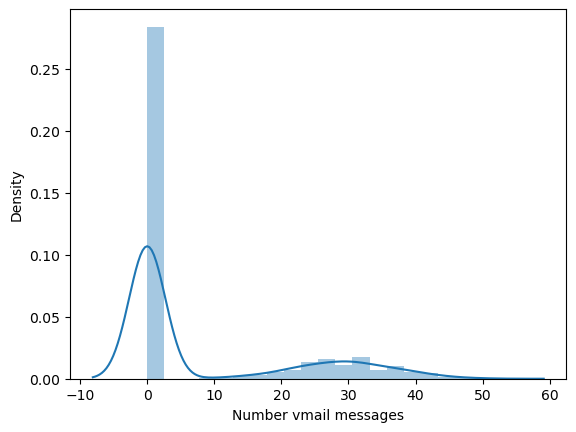

In [53]:
## Analysing by using displot diagram

sns.distplot(df['Number vmail messages'])

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

#### 2. What is/are the insight(s) found from the chart?
Feature Number vmail messages right skewed

#### 3. Will the gained insights help creating a positive business impact?
most customers have a relatively low number of voicemail message

<Figure size 1000x800 with 0 Axes>

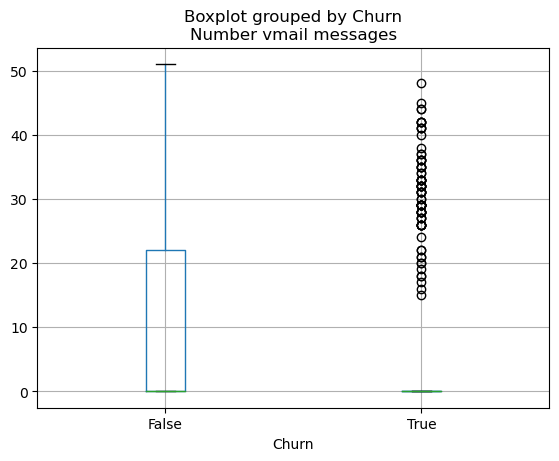

In [54]:
## Analysing by using boxplot diagram between 'number vmail messages' and 'churn'

fig = plt.figure(figsize = (10, 8)) 
df.boxplot(column = 'Number vmail messages', by = 'Churn')
fig.suptitle('Number vmail message', fontsize = 14, fontweight='bold')
plt.show()

#### 1. Why did you pick the specific chart?
boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn

#### 3. Will the gained insights help creating a positive business impact?
Yes, high numbers of voice-mail messages are associated with churn

In [55]:
## Exploring Customer service calls feature - Univariate and Bivariate analysis

In [56]:
## customer service calls value count

df['Customer service calls'] = df['Customer service calls'].astype('str')
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [57]:
## Calculating the Customer service calls vs Churn percentage

Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


<Axes: xlabel='Customer service calls', ylabel='count'>

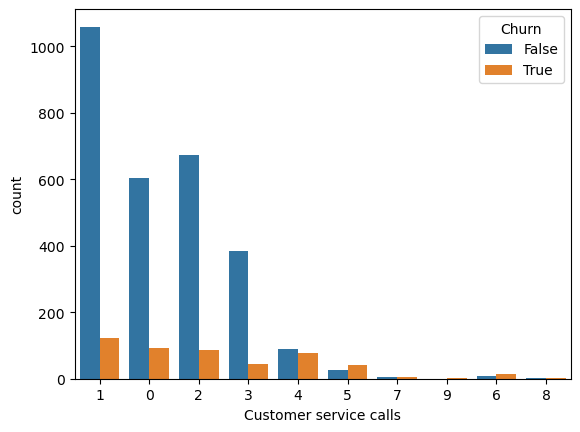

In [58]:
## Analysing using countplot

sns.countplot(x = 'Customer service calls',hue = "Churn",data = df)

#### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to Customer service calls, I have used Bar Chart.

#### 2. What is/are the insight(s) found from the chart?
It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

#### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact. By identifying the main reason for customer churn being bad customer service

In [59]:
## Exploring Total day minutes feature - Univariate and Bivariate analysis

In [60]:
## Creating Account lenth churn and not churn df

Total_day_minutes_churn = df[(df['Churn'] == True)]
Total_day_minutes_not_churn = df[(df['Churn'] == False)]

In [61]:
## Mean 

print('Mean of Total day minutes of all data',df['Total day minutes'].mean())
print('Mean of Total day minutes of Churn',Account_length_churn['Total day minutes'].mean())
print('Mean of Total day minutes of Not churn',Account_length_not_churn['Total day minutes'].mean())
print()

## Median 

df['Total day minutes'].median()
print('Median of Total day minutes of all data',df['Total day minutes'].median())
print('Median of Total day minutes of Churn',Account_length_churn['Total day minutes'].median())
print('Median of Total day minutes of Not churn',Account_length_not_churn['Total day minutes'].median())

Mean of Total day minutes of all data 179.77509750975094
Mean of Total day minutes of Churn 206.91407867494823
Mean of Total day minutes of Not churn 175.1757543859649

Median of Total day minutes of all data 179.4
Median of Total day minutes of Churn 217.6
Median of Total day minutes of Not churn 177.2


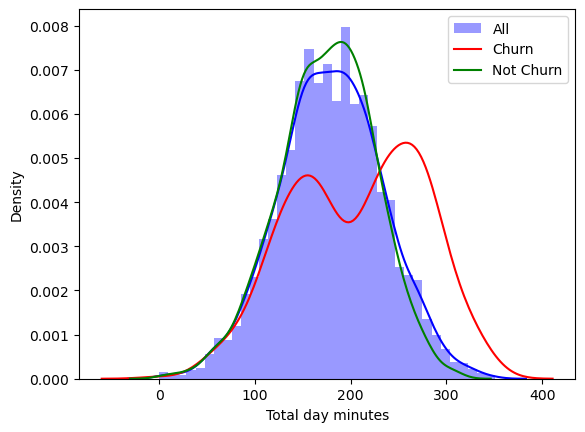

In [62]:
sns.distplot(df['Total day minutes'], color = 'blue' , label = 'All') 
sns.distplot(Total_day_minutes_churn['Total day minutes'],color = 'red' , label = 'Churn',hist = False)
sns.distplot(Total_day_minutes_not_churn['Total day minutes'],color = 'green' , label = 'Not Churn',hist = False) 
plt.legend()

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

#### 2. What is/are the insight(s) found from the chart?
Distribution of total day minutes of all churn and churn is normally distrubuted and with non churn data distrubution is not normal

#### 3. Will the gained insights help creating a positive business impact?
it can be seen that the mean and median of total day minutes for customers who have churned is significantly higher than those who have not churned. This suggests that customers who use more minutes may be more likely to churn.

<Figure size 1000x800 with 0 Axes>

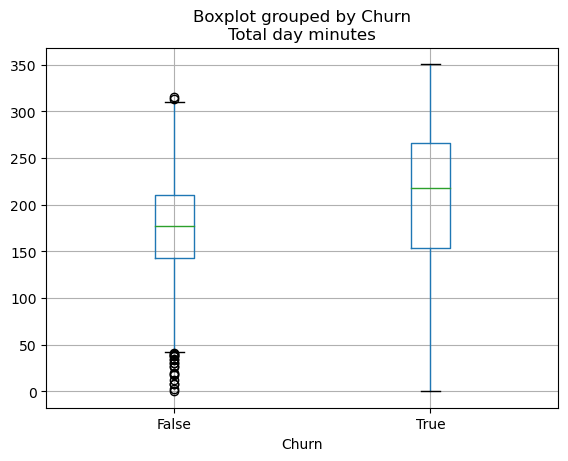

In [63]:
## Analysing by using boxplot diagram between 'Account length' and 'churn'

fig = plt.figure(figsize = (10, 8)) 
df.boxplot(column = 'Total day minutes', by = 'Churn')
plt.title("Total day minutes")
plt.show()

#### 1. Why did you pick the specific chart?
boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
There is no outliers in Total day minutes feature with respect to churn.

There is outliers in Total day minutes feature with respect to not churn in both side.

In [66]:
## creating function to show mran, meadian, distribution and outliers of continuous features

def mean_median_distribution_outliers(feature):
    churn = df[(df['Churn'] == True)]
    not_churn = df[(df['Churn'] == False)]
    
    ## Mean 

    print('Mean of', feature,'of all data',df[feature].mean())
    print('Mean of', feature,'of Churn',churn[feature].mean())
    print('Mean of', feature,'of Not churn',not_churn[feature].mean())
    print()

    ## Median 

    df['Total day minutes'].median()
    print('Median of', feature,'of all data',df[feature].median())
    print('Median of', feature,'of Churn',churn[feature].median())
    print('Median of', feature,'of Not churn',not_churn[feature].median())

    sns.distplot(df[feature], color = 'blue' , label = 'All') 
    sns.distplot(churn[feature],color = 'red' , label = 'Churn',hist = False)
    sns.distplot(not_churn[feature],color = 'green' , label='Not Churn',hist = False) 
    plt.legend()

    ## Analysing by using boxplot diagram between 'Account length' and 'churn'
    
    fig = plt.figure(figsize = (10, 8)) 
    df.boxplot(column = feature, by = 'Churn')
    plt.title(feature)
    plt.show()

In [67]:
## Exploring Total day calls feature - Univariate and Bivariate analysis

Mean of Total day calls of all data 100.43564356435644
Mean of Total day calls of Churn 101.33540372670808
Mean of Total day calls of Not churn 100.28315789473685

Median of Total day calls of all data 101.0
Median of Total day calls of Churn 103.0
Median of Total day calls of Not churn 100.0


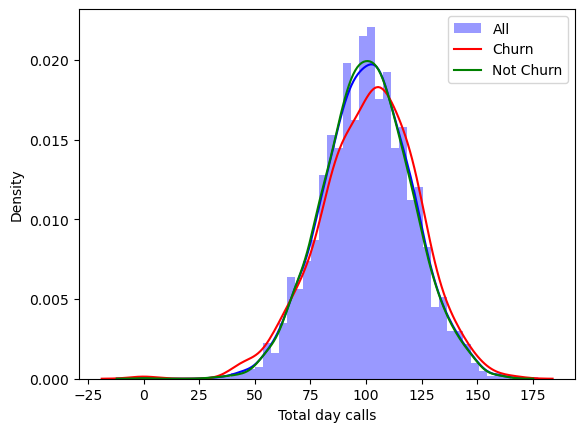

<Figure size 1000x800 with 0 Axes>

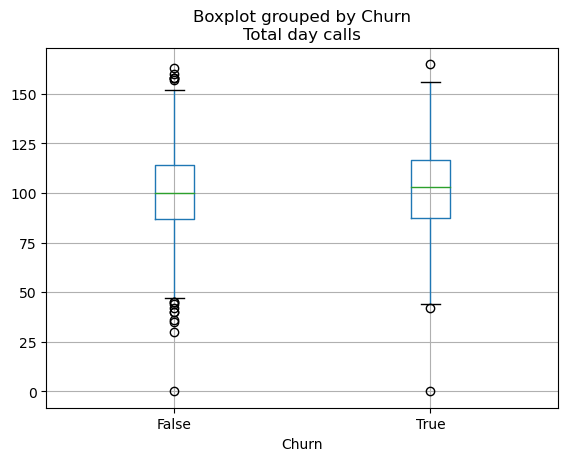

In [68]:
mean_median_distribution_outliers('Total day calls')

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
Distribution of total day calls of all churn and churn is normally distrubuted and with non churn data distrubution is not normal

There is no outliers in Total day calls feature with respect to churn.

There is outliers in Total day calls feature with respect to not churn in both side.

In [69]:
## Exploring Total day charge feature - Univariate and Bivariate analysis

Mean of Total day charge of all data 30.562307230723075
Mean of Total day charge of Churn 35.17592132505176
Mean of Total day charge of Not churn 29.780421052631578

Median of Total day charge of all data 30.5
Median of Total day charge of Churn 36.99
Median of Total day charge of Not churn 30.12


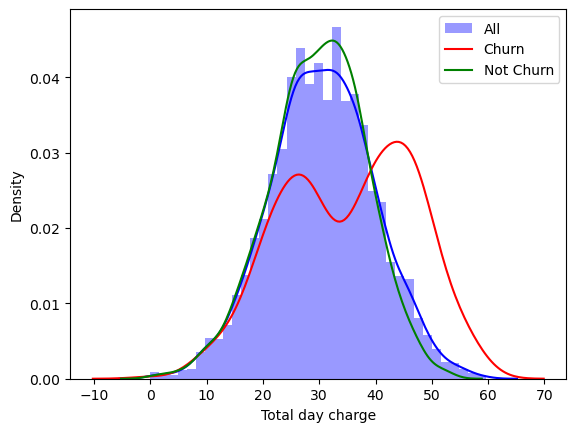

<Figure size 1000x800 with 0 Axes>

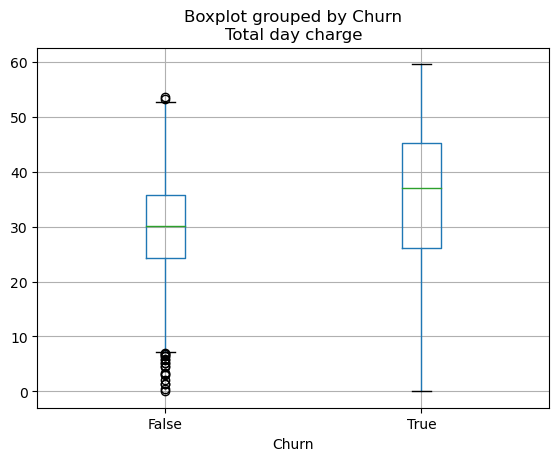

In [70]:
mean_median_distribution_outliers('Total day charge')

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
Distribution of total day minutes of all churn and not churn is normally distrubuted and with non churn data distribution is not normal

churn have a higher mean and median total day charge compared to customers who do not churn.

There is no outliers in Total day charge feature with respect to churn.

There is outliers in Total day charge feature with respect to not churn in both side.

#### 3. Will the gained insights help creating a positive business impact?
The insights suggest that customers who churn have a higher mean and median total day charge compared to customers who do not churn. The distribution of total day minutes for churn and non-churn customers is also different, with the former being normally distributed and the latter not. Additionally, there are outliers in the total day charge feature for non-churn customers.

In [71]:
## Exploring Total eve minutes feature - Univariate and Bivariate analysis

Mean of Total eve minutes of all data 200.98034803480348
Mean of Total eve minutes of Churn 212.41014492753624
Mean of Total eve minutes of Not churn 199.043298245614

Median of Total eve minutes of all data 201.4
Median of Total eve minutes of Churn 211.3
Median of Total eve minutes of Not churn 199.6


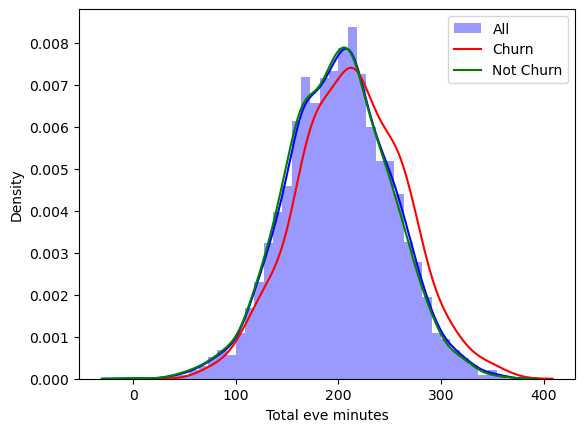

<Figure size 1000x800 with 0 Axes>

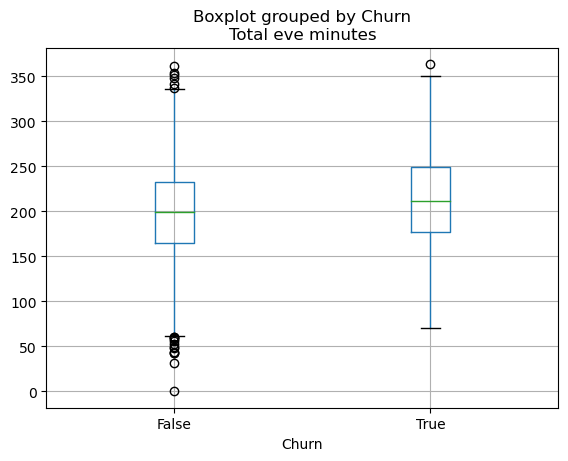

In [72]:
mean_median_distribution_outliers('Total eve minutes')

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
Distribution of Total eve minutes of all churn and churn is normally distrubuted and with non churn data distribution is not normal

There is outliers Total eve minutes feature with respect to churn in upper side.

There is outliers Total eve minutes feature with respect to not churn in both side.

#### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can potentially help create a positive business impact. For example, the mean and median of total evening minutes for customers who have churned is higher than those who have not churned. This suggests that customers who use more evening minutes may be more likely to churn.

In [73]:
## Exploring Total eve calls feature - Univariate and Bivariate analysis

Mean of Total eve calls of all data 100.11431143114311
Mean of Total eve calls of Churn 100.56107660455487
Mean of Total eve calls of Not churn 100.03859649122808

Median of Total eve calls of all data 100.0
Median of Total eve calls of Churn 101.0
Median of Total eve calls of Not churn 100.0


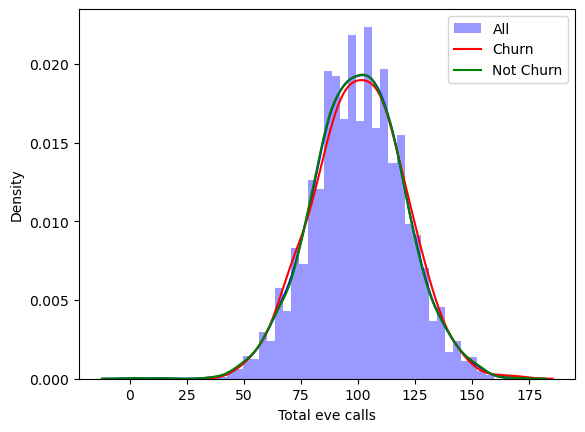

<Figure size 1000x800 with 0 Axes>

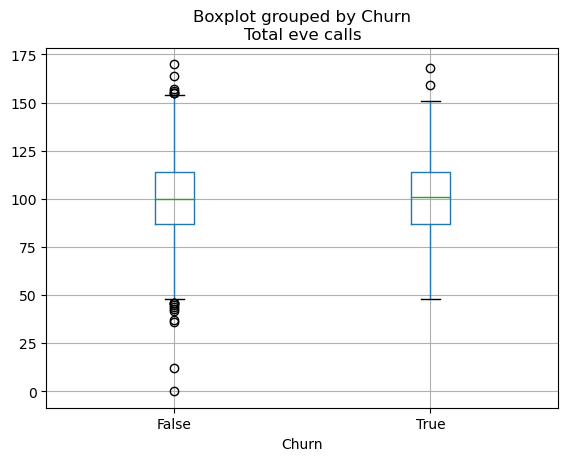

In [74]:
mean_median_distribution_outliers('Total eve calls')

#### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

#### 2. What is/are the insight(s) found from the chart?
Distribution of Total eve calls of all churn and churn is normally distrubuted and with non churn data distribution is not normal

There is outliers in Total eve calls feature with respect to churn in upper side.

There is outliers in Total eve calls feature with respect to not churn in both side.

#### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights from the Telecom Churn Analysis chart can potentially help create a positive business impact. For example, by understanding that the mean and median of Total eve calls for customers who have churned are slightly higher than those who have not churned